In [6]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install matplotlib

     |████████████████████████████████| 10.3 MB 5.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 9.3 MB/s eta 0:00:01


In [2]:
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [3]:
def run():
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 5000.0
    lowcut = 500.0
    highcut = 1250.0

    # Plot the frequency response for a few different orders.
    plt.figure(1)
    plt.clf()
    for order in [3, 6, 9]:
        b, a = butter_bandpass(lowcut, highcut, fs, order=order)
        w, h = freqz(b, a, worN=2000)
        plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

    plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
             '--', label='sqrt(0.5)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.legend(loc='best')

    # Filter a noisy signal.
    T = 0.05
    nsamples = int(T * fs)
    t = np.linspace(0, T, nsamples, endpoint=False)
    a = 0.02
    f0 = 600.0
    # The input of scipy filter should be a Numpy array
    x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
    print(type(x))
    x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
    x += a * np.cos(2 * np.pi * f0 * t + .11)
    x += 0.03 * np.cos(2 * np.pi * 2000 * t)
    plt.figure(2)
    plt.clf()
    plt.plot(t, x, label='Noisy signal')

    y = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)
    plt.plot(t, y, label='Filtered signal (%g Hz)' % f0)
    plt.xlabel('time (seconds)')
    plt.hlines([-a, a], 0, T, linestyles='--')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')

    plt.show()


<class 'numpy.ndarray'>


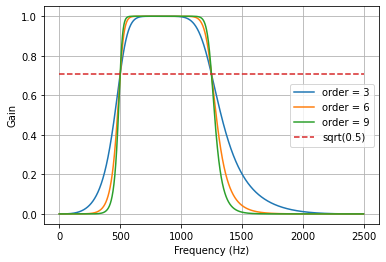

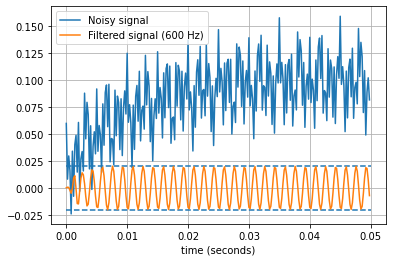

In [12]:
run()

<class 'numpy.ndarray'>


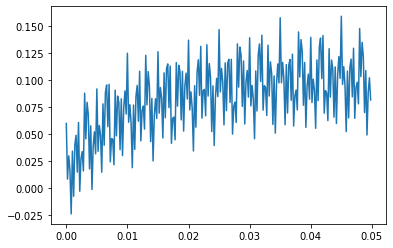

Order of the Filter= 12
Cut-off frequency= 0.500 rad/s 


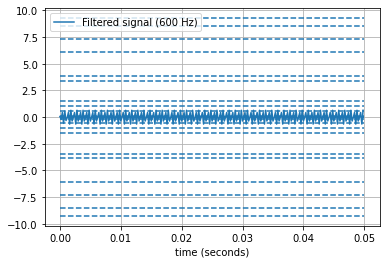

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math

def butter_highpass_filter(f_s, f_pass, f_stop, fs = 0.5, td = 1, g_pass = 1, g_stop = 50, wc = None):
    """
    Return explanation:
    N: number of orders
    b: numerator of the Filter
    a: denominator of the filter
    """
    wp = f_pass / (f_s / 2)
    ws = f_stop / (f_s / 2)
    omega_p = (2 / td) * np.tan(wp / 2)
    omega_s = (2 / td) * np.tan(ws / 2)
    # Find the order and natural frequency of the highpass filter
    N, wn = signal.buttord(omega_p, omega_s, g_pass, g_stop, analog = True)
    # Find the Gain of the highpass filter
    if wc:
        b, a = signal.butter(N, wc, btype = 'high', analog = True)
        wn = wc
    else:
        b, a = signal.butter(N, wn, btype = 'high', analog = True)
    return N, b, a, wn
def main(input, t, f0):
    f_sample = 5000
    f_pass = 1050
    f_stop = 600
    fs = 0.5
    n, b, a, wn = butter_highpass_filter(f_sample, f_pass, f_stop, wc = 0.5)
    print("Order of the Filter=", n)
    print("Cut-off frequency= {:.3f} rad/s ".format(wn))
    response = signal.lfilter(b, a, input)
    plt.plot(t, response, label='Filtered signal (%g Hz)' % f0)
    plt.xlabel('time (seconds)')
    plt.hlines([-a, a], 0, T, linestyles='--')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')
    plt.show()
    
    # Illustrating impulse response
#     plt.stem(np.arange(0, 0.05), input, markerfmt='D', use_line_collection=True)
#     plt.stem(np.arange(0, 0.05), response, use_line_collection=True)
#     plt.margins(0, 0.1)

#     plt.xlabel('Time [samples]')
#     plt.ylabel('Amplitude')
#     plt.grid(True)
#     plt.show()


if __name__ == '__main__':
    T = 0.05
    nsamples = int(T * 5000)
    t = np.linspace(0, T, nsamples, endpoint=False)
    a = 0.02
    f0 = 600.0
    # The input of scipy filter should be a Numpy array
    x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
    print(type(x))
    x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
    x += a * np.cos(2 * np.pi * f0 * t + .11)
    x += 0.03 * np.cos(2 * np.pi * 2000 * t)
    plt.figure(2)
    plt.clf()
    plt.plot(t, x, label='Noisy signal')
    plt.show()
    input = signal.unit_impulse(40)
    main(x, t, f0)
